# Visualizzazione del dataset
Carichiamo il dataset di training e di testing di MNIST in due variabili di tipo Pytorch datasets

In [25]:
import torch  # pip3 install torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets  # pip3 install torchvision
from torchvision.transforms import ToTensor

# Converts a PIL Image or numpy.ndarray (h x w x n) in the range [0, 255] to a torch.FloatTensor of shape (n x h x w)
trans = ToTensor()

mnist_train: datasets.mnist.MNIST = datasets.MNIST(root="../data", train=True, transform=trans, download=True)
mnist_test: datasets.mnist.MNIST = datasets.MNIST(root="../data", train=False, transform=trans, download=True)

In [26]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

In [27]:
mnist_train.targets.shape

torch.Size([60000])

Features are organized in a 3-dimensional tensor of size $n\times h\times w$ of $n$ items (matrices), each of $h$ rows and $w$ columns. Targets are organized as a 1d tensor of size $n$

In [28]:
print(f'Training set features: n={mnist_train.data.numpy().shape[0]}, h={mnist_train.data.numpy().shape[1]}, w={mnist_train.data.numpy().shape[2]}')
print(f'Training set targets: n={mnist_train.targets.numpy().shape[0]}')

Training set features: n=60000, h=28, w=28
Training set targets: n=60000


The test set is organized in the same way, with a different value of $n$

In [29]:
print(f'Test set features: n={mnist_test.data.numpy().shape[0]}, h={mnist_test.data.numpy().shape[1]}, w={mnist_test.data.numpy().shape[2]}')
print(f'Test set targets: n={mnist_test.targets.numpy().shape[0]}')

Test set features: n=10000, h=28, w=28
Test set targets: n=10000


An image is coded as a matrix 28x28 reals in [0,1] (higher value = darker color)

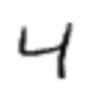

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [32]:
# Ho separato il codice per il training e la predizione nel file training.py. Qua importo solo quello che uso.
from training import displayOneData, displayData

idx = 2
displayOneData(mnist_train.data, mnist_train.targets, idx)
torch.set_printoptions(threshold=10000, linewidth=2000)
# prendo l'immagine dal tensore con indice idx, con tutte le righe e tutte le colonne della matrice 28x28
print(mnist_train.data[idx, :, :])

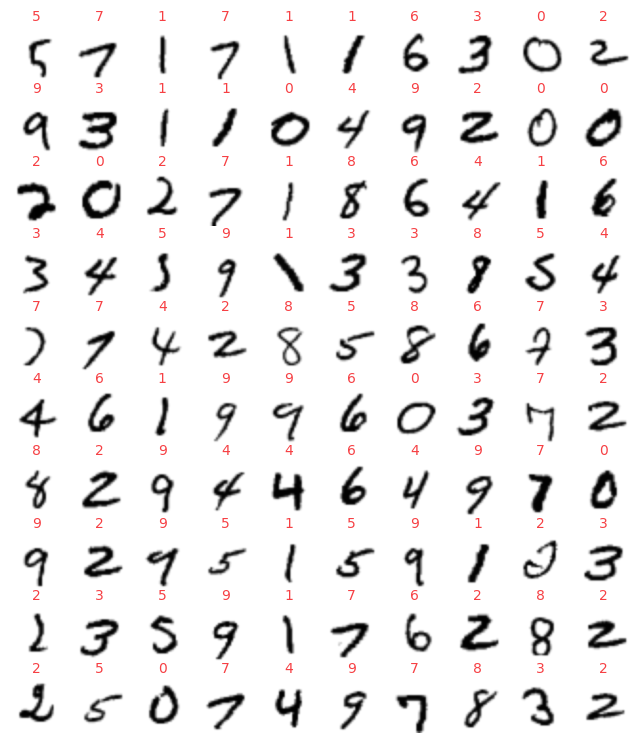

In [33]:
displayData(mnist_train.data[100:200], mnist_train.targets[100:200], class_value=True)

# One hot encoding
I primi 10 valori Target. I target sono i valori corretti. 

In [34]:
mnist_train.targets[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

Gli stessi 10 valori in formato one_hot

In [35]:
torch.nn.functional.one_hot(mnist_train.targets[:10])

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [36]:
height = mnist_train.data.shape[1]
width = mnist_train.data.shape[2]
num_classes = mnist_train.targets.unique().shape[0]

Define data loaders to provide datasets batches during the training process

In [37]:
batch_size = 100

loaders = {'train': DataLoader(mnist_train, batch_size=batch_size, shuffle=True),
'test': DataLoader(mnist_test, batch_size=batch_size, shuffle=True)}

# Rete neurale a 2 strati
First approach: 
*   For each class, compute a linear combination of the ($28\times 28 =784$) values $x_i, i=1,\ldots, 784$ of the image, plus a constant (*bias*) $b$: that is, $785$ coefficients $w_1,\ldots, w_{784}, b$ must be defined for each class, for a total number of $785\times 10=7850$ coefficients
*   For each class, to the value resulting from the linear combination $$\sum_{i=1}^{784}w_ix_i+b$$ a suitable nonlinear function is applied (in this case the *exponential* function $e^{x}$)
*   The resulting values, one for each class, are *normalized* to sum to $1$
*   The result can be interpreted as a set of probabilities, associated to the set of disjoint events: the image belongs to the $i$-th class (it is a $0, 1, \ldots, 9$)
*   A strategy for assigning the image to a class can then be applied, such as assigning to the class of largest probability. In case, risk minimization approaches can be applied

In [56]:
class NeuralNet0(nn.Module):
    def __init__(self, w, h, num_classes):
        super(NeuralNet0, self).__init__()
        self.f = nn.Flatten() # Appiattisce la matrice 28x28 in un array 1x784
        self.l1 = nn.Linear(w * h, num_classes) # definisce un layer con 784 neuroni in input e 10 in output
        self.dropout= nn.Dropout(p=0.2)
        self.ls = nn.LogSoftmax(dim=1) # applica la softmax per ottenere la distribuzione di probabilità sulle 10 classi

    def forward(self, x):
        """
        Qua definiamo come viene eseguito il passo froward della rete neurale.
        Segue lo stesso ordine del costruttore. x è la matrice 28x28 in input
        """
        out = self.f(x) # 28x28 -> 784x1
        out = self.l1(out) # 784 -> 10
        out = self.dropout(out) # il grafico viene male se togli il dropout!!
        out = self.ls(out) # 10 --(normalizza a 1)--> 10
        return out

Create the network

In [57]:
model0 = NeuralNet0(height, width, num_classes)

In [58]:
from torchinfo import summary
summary(model0, input_size=(batch_size, height * width))

c:\Users\emeli\AppData\Local\Programs\Python\Python310\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\emeli\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet0                               [100, 10]                 --
├─Flatten: 1-1                           [100, 784]                --
├─Linear: 1-2                            [100, 10]                 7,850
├─Dropout: 1-3                           [100, 10]                 --
├─LogSoftmax: 1-4                        [100, 10]                 --
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
Total mult-adds (M): 0.79
Input size (MB): 0.31
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.35

Define a loss function and a gradient descent method

In [59]:
# Possiamo aumentare il learning rate per velocizzare l'addestramento, oppure diminuirlo per addestrare più a fondo.
# E' buona norma usare una via di mezzo. Parti da 0.001 e poi man mano moltiplica per 3 (e arrotondando .9 a 1), finché i tempi sono abbastanza brevi e le performance abbastanza buone.
learning_rate = 0.001

#NLLLoss: Negative Log Likelihood Loss
loss_func0 = nn.NLLLoss(reduction='sum')
optimizer0 = torch.optim.Adam(model0.parameters(), lr=learning_rate)

Qua definiamo il numero di epoche, ovvero quante volte verrà passato l'intero dataset alla rete neurale.
A ogni epoca, la rete impara qualcosa di nuovo sui dati. C'è rischio di overfitting, quindi per migliorare le statistiche, spesso ci si ferma prima della fine del numero di epoche (Early stopping). Per fare l'early stopping esistono metodi di callback (almeno nn TensorFlow, qua stiamo usando PyTorch), che al termine di un'epoca valutano l'accuratezza (o la metrica scelta) che permettono di fermare l'addestramento in anticipo, senza completare tutte le epoche, al raggiungimento di una certa soglia.

In [63]:
#TODO: capire come funziano le callback e come implementarla
num_epochs = 4

Eseguiamo il training del modello.
Con sole tre epoche e una rete con 1 solo layer otteniamo un'accuratezza superiore al 90%

In [64]:
from training import train
model0 = model0.to('cpu') # NECESSARIO se usi PyTorch su GPU
h, h_batch = train(model0, loaders, loss_func0, num_epochs, optimizer0, report=True)

Epoch #1
............................................................xxxxxxxxxx 
 Loss 0.5643, Training set accuracy 0.7936, Test set accuracy 0.9186
Epoch #2
............................................................xxxxxxxxxx 
 Loss 0.5516, Training set accuracy 0.7990, Test set accuracy 0.9192
Epoch #3
............................................................xxxxxxxxxx 
 Loss 0.5517, Training set accuracy 0.7979, Test set accuracy 0.9197
Epoch #4
............................................................xxxxxxxxxx 
 Loss 0.5453, Training set accuracy 0.7980, Test set accuracy 0.9215


In questo caso le tre linee rosse rappresentano le tre epoche. Già dalla prima epocha si hanno dei buoni risultati.

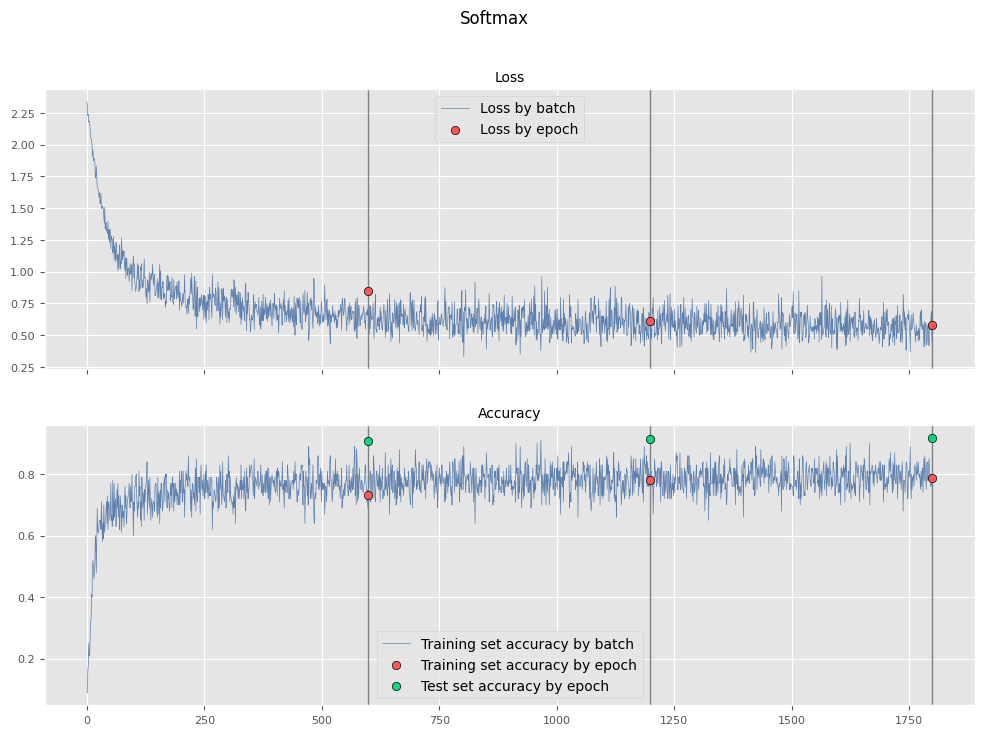

In [62]:
from training import plot_metrics, save_model_coeffs, load_model_coeffs
plot_metrics('Softmax', h, h_batch, num_epochs=num_epochs)

In [19]:
save_model_coeffs(model0, 'softmax')

Saved model coefficients to disk


In [20]:
#load_model_coeffs(model0, 'softmax')

In [54]:
from training import predict
ptr, ytr, pte, yte = predict(model0, loaders)

# Matrice di confusione
Con la matrice di confusione possiamo vedere per quali cifre il predittore si comporta bene e quali confonde.

<Figure size 1200x600 with 0 Axes>

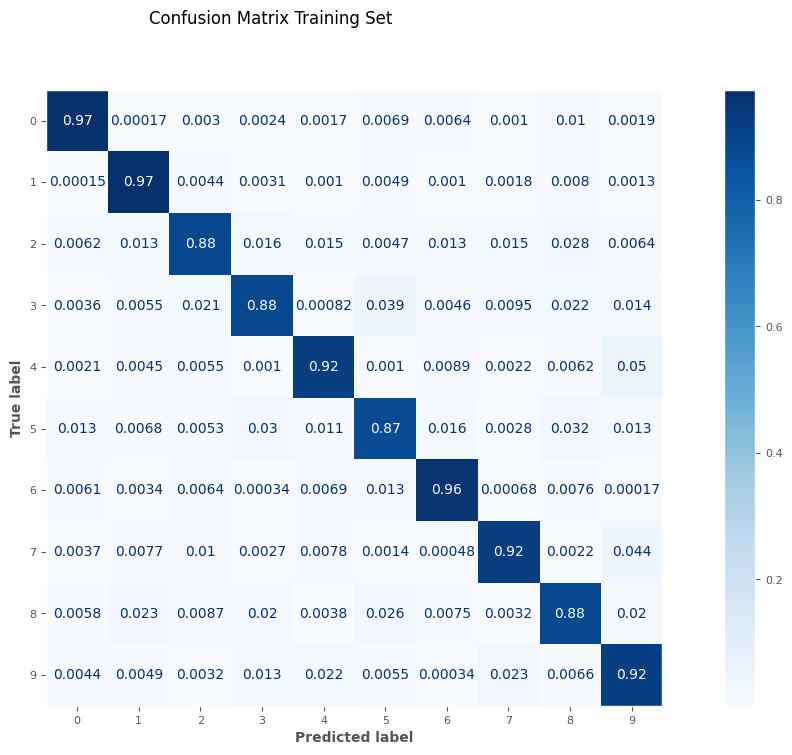

In [22]:
from training import plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(ytr, ptr, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Training Set")
plt.grid(None)
plt.show()

# Metriche
**Accuracy**: $$\frac{\text{\# items classified correctly}}{\text{\# items}}$$

**Precision class $i$**: $$\frac{\text{\# items from class $i$ classified correctly}}{\text{\# items classified as class $i$}}$$

**Recall class $i$**: $$\frac{\text{\# items from class $i$ classified correctly}}{\text{\# items from class $i$}}$$

**F-score class $i$**: $$\frac{\text{Precision classe $i$} \times \text{Recall classe $i$}}{\text{Precision classe $i$}+\text{Recall classe $i$}}$$

Con la funzione *classification_report* di Scikit-Learn possiamo confrontare le y predette con il target nel training set per vedere come si comporta il nostro predittore in base a queste 4 metriche, per ognuna delle 10 classi.

In [23]:
from sklearn.metrics import classification_report

print('Training set')
print(classification_report(ytr, ptr))

Training set
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5923
           1       0.94      0.97      0.96      6742
           2       0.93      0.88      0.90      5958
           3       0.91      0.88      0.90      6131
           4       0.93      0.92      0.92      5842
           5       0.88      0.87      0.88      5421
           6       0.94      0.96      0.95      5918
           7       0.94      0.92      0.93      6265
           8       0.88      0.88      0.88      5851
           9       0.86      0.92      0.89      5949

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



Finora abbiamo visto il training set. Ma quello che ci interessa è il testing set!

<Figure size 1200x600 with 0 Axes>

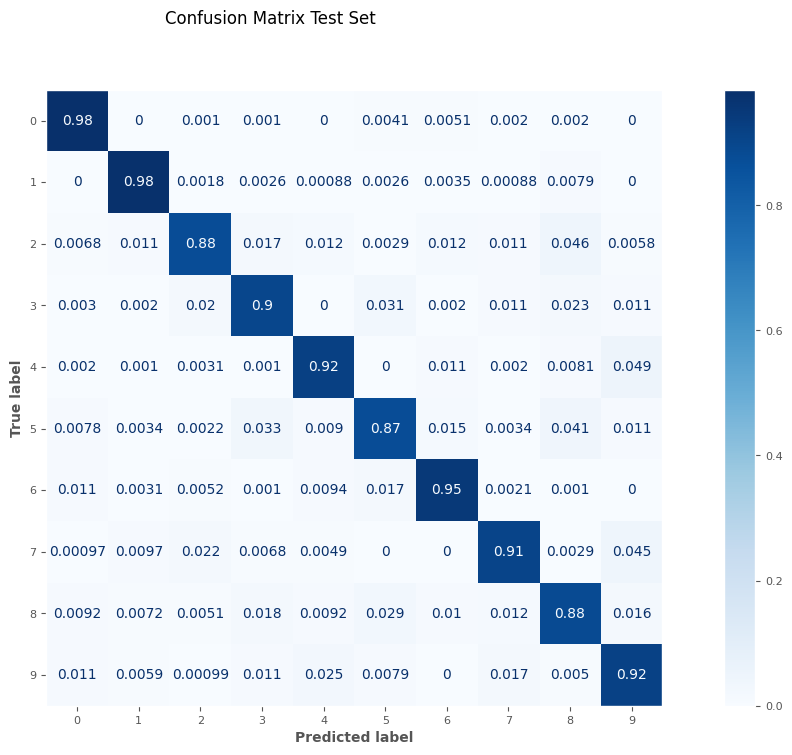

In [24]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(yte, pte, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Test Set")
plt.grid(None)
plt.show()

In [25]:
print('Test set')
print(classification_report(yte, pte))

Test set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.91      0.90      0.90      1010
           4       0.93      0.92      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.94      0.91      0.92      1028
           8       0.86      0.88      0.87       974
           9       0.87      0.92      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [26]:
X = next(iter(loaders['train']))[0]

In [27]:
X.numpy().shape

(100, 1, 28, 28)

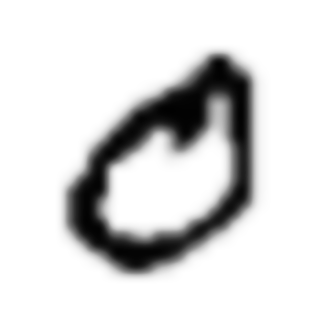

In [28]:
idx = 21
x = trans(mnist_train.data[idx, :, :].numpy())  #.flatten(start_dim=0, end_dim=-1)
y = mnist_train.targets[idx].numpy()
image = mnist_train.data[idx, :, :].numpy()
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='Greys', interpolation='quadric')
plt.grid(None)
plt.axis('off')
plt.show()

In [29]:
print(f"This is a {y}")

This is a 0


In [31]:
import numpy as np
predict0 = model0(x)

predictions_probs = torch.exp(predict0).detach().squeeze()
predicted_class = np.squeeze(np.argmax(predictions_probs, axis=-1))
print("Predicted probabilities: [" + ", ".join('%5.4f' % x for x in predictions_probs) + "]")
print(f"Class: {y}. Prediction: {predicted_class}")

Predicted probabilities: [0.9901, 0.0000, 0.0000, 0.0005, 0.0000, 0.0092, 0.0000, 0.0001, 0.0001, 0.0000]
Class: 0. Prediction: 0


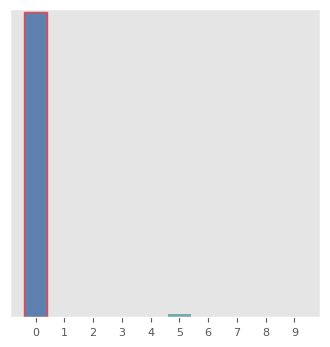

In [32]:
from training import plot_label_dist
plot_label_dist(predictions_probs, predicted_class, y)

# Rete neurale a 3 strati
Stavolta proviamo con una rete neurale con due strati.
Il primo strato riceve i vettori 1x785 ed esegue una ReLU (max(0,x)), mentre il secondo con una softmax produce 10 risultati.
Tra primo e secondo strato ci sono *hidden_size* neuroni: siamo noi a decidere il numero di neuroni in input al 2° livello (ad es. 512).

In [61]:
class NeuralNet1(nn.Module):
    def __init__(self, h, w, hidden_size, num_classes):
        super(NeuralNet1, self).__init__()
        self.f = nn.Flatten()
        self.l1 = nn.Linear(w * h, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2) # Con il dropout, si rimuovono alcuni neuroni casualmente, per ridurre l'overfitting!
        self.l2 = nn.Linear(hidden_size, num_classes)
        self.ls = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.f(x)
        out = self.l1(out)
        out = self.relu(out)
        out = self.dropout(out) # il grafico viene male se togli il dropout!!
        out = self.l2(out)
        out = self.ls(out)
        return out

In [62]:
hidden_size = 512
model1 = NeuralNet1(height, width, hidden_size, num_classes)

In [63]:
summary(model1)

Layer (type:depth-idx)                   Param #
NeuralNet1                               --
├─Flatten: 1-1                           --
├─Linear: 1-2                            401,920
├─ReLU: 1-3                              --
├─Dropout: 1-4                           --
├─Linear: 1-5                            5,130
├─LogSoftmax: 1-6                        --
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0

Stavolta abbiamo più di 400.000 parametri! Il modello è molto più complesso di prima. Vediamo come si comporta.

In [64]:
learning_rate = 0.001

loss_func1 = nn.NLLLoss(reduction='sum')
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

In [65]:
num_epochs = 3

Stavolta su training otteniamo accuracy del 97%! Molto meglio, ma il modello ha anche 1000 volte i parametri del procedente...

In [66]:
h, h_batch = train(model1, loaders, loss_func1, num_epochs, optimizer1, report=True)

Epoch #1
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cp

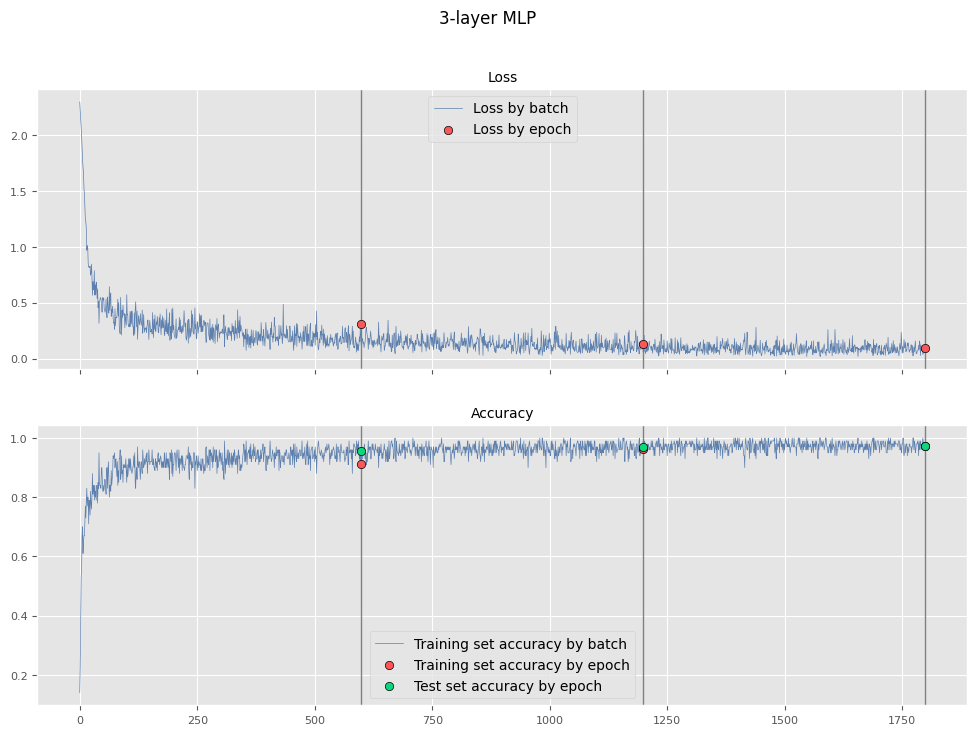

In [67]:
plot_metrics('3-layer MLP', h, h_batch)

In [46]:

ptr, ytr, pte, yte = predict(model1, loaders)

<Figure size 1200x600 with 0 Axes>

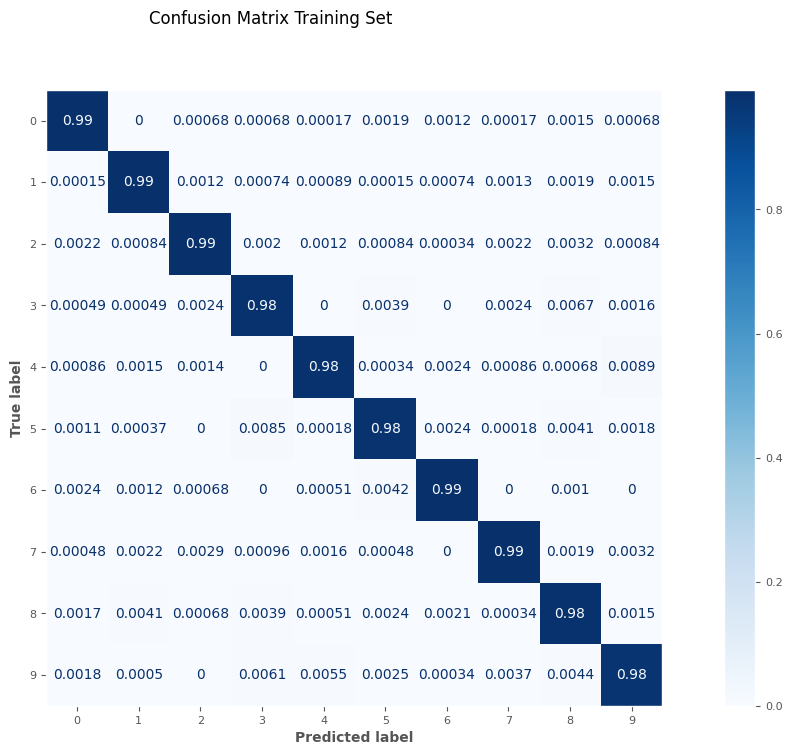

In [47]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(ytr, ptr, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Training Set")
plt.grid(None)
plt.show()

I risultati sono praticamente perfetti sul training set. E sul testing set?

In [48]:
print('Training set')
print(classification_report(ytr, ptr))

Training set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.98      0.98      0.98      6131
           4       0.99      0.98      0.99      5842
           5       0.98      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.97      0.98      0.98      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



<Figure size 1200x600 with 0 Axes>

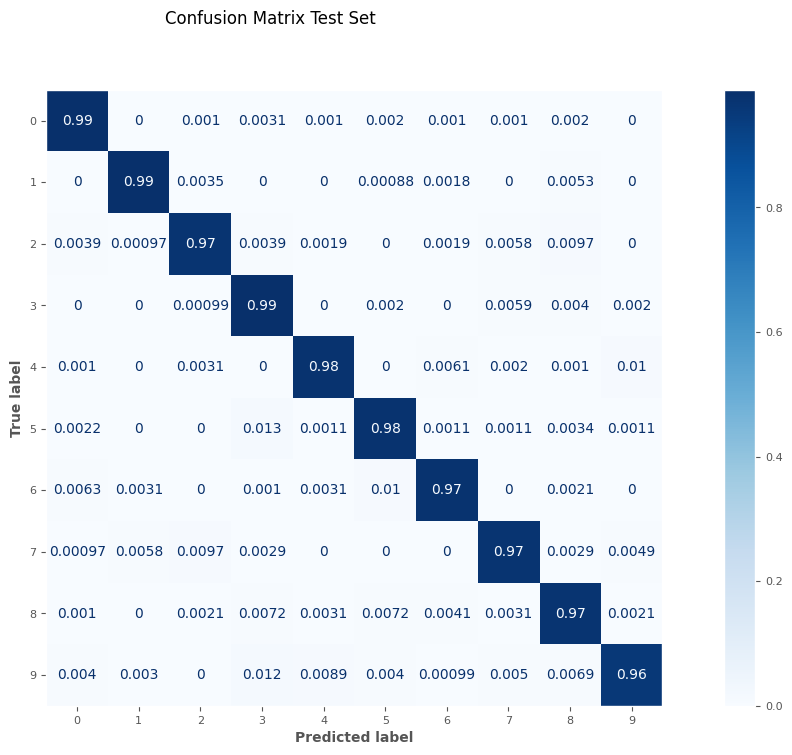

In [49]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(yte, pte, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Test Set")
plt.grid(None)
plt.show()

Leggermente peggiori, ma meglio della rete iniziale.

In [50]:
print('Test set')
print(classification_report(yte, pte))

Test set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Rete neurale con 4 strati
Stavolta costruiamo una rete neurale con due strati Lineari con ReLU+Dropout e uno strato lineare con Softmax.

In [51]:
hidden_size1 = 512
hidden_size2 = 256

dropout_rate1 = .2
dropout_rate2 = .2

In [52]:
class NeuralNet2(nn.Module):
    def __init__(self, h, w, hidden_size1, hidden_size2, dropout_rate1, dropout_rate2, num_classes):
        super(NeuralNet2, self).__init__()
        self.f = nn.Flatten()
        self.l1 = nn.Linear(w * h, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_rate1)
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_rate2)
        self.l3 = nn.Linear(hidden_size2, num_classes)
        self.ls = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.f(x)
        out = self.l1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.l3(out)
        out = self.ls(out)
        return out

In [53]:
model2 = NeuralNet2(height, width, hidden_size1, hidden_size2, dropout_rate1, dropout_rate2, num_classes)

535818 coefficienti: il modello con 3 stati nascosti è ancora più complesso del precedente.

In [54]:
s = 0
for name, param in model2.named_parameters():
    print(f"Parameter {name}, shape {param.shape}, {param.numel()} coefficients")
    s += param.numel()
print(f"{s} coefficients overall")

Parameter l1.weight, shape torch.Size([512, 784]), 401408 coefficients
Parameter l1.bias, shape torch.Size([512]), 512 coefficients
Parameter l2.weight, shape torch.Size([256, 512]), 131072 coefficients
Parameter l2.bias, shape torch.Size([256]), 256 coefficients
Parameter l3.weight, shape torch.Size([10, 256]), 2560 coefficients
Parameter l3.bias, shape torch.Size([10]), 10 coefficients
535818 coefficients overall


In [55]:
learning_rate = 0.001

loss_func2 = nn.NLLLoss(reduction='sum')
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [56]:
num_epochs = 3

In [57]:
h, h_batch = train(model2, loaders, loss_func2, num_epochs, optimizer2, report=True)

Epoch #1
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cp

Praticamente ha le stesse performance della precedente. Peggiora leggermente il training set, ma migliora il testing set.

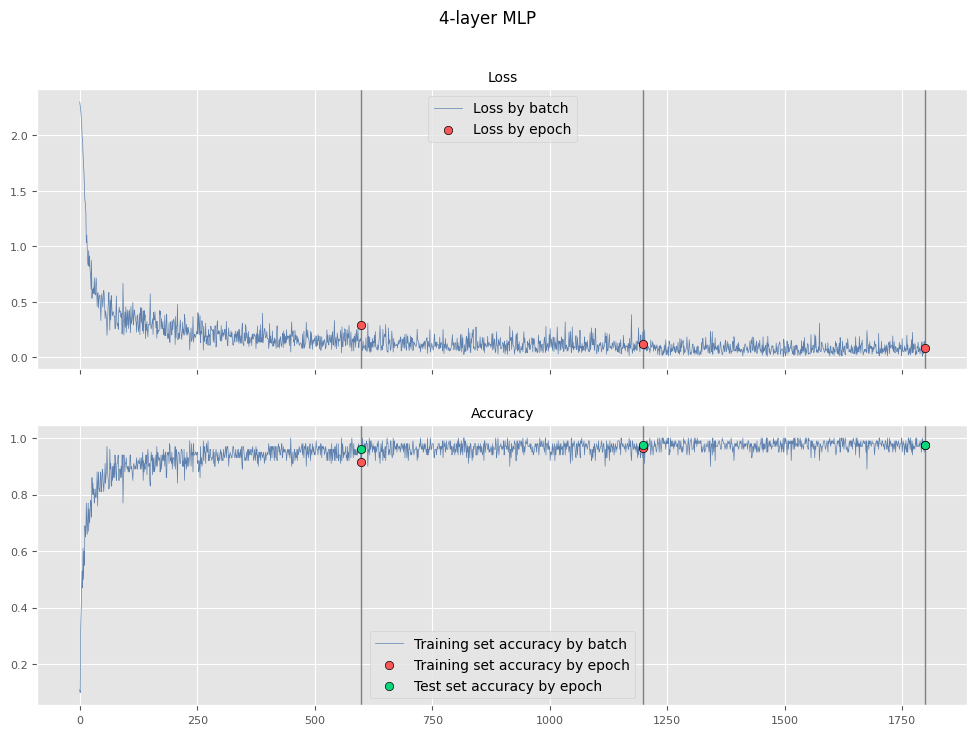

In [58]:
plot_metrics('4-layer MLP', h, h_batch)

In [59]:
ptr, ytr, pte, yte = predict(model2, loaders)

<Figure size 1200x600 with 0 Axes>

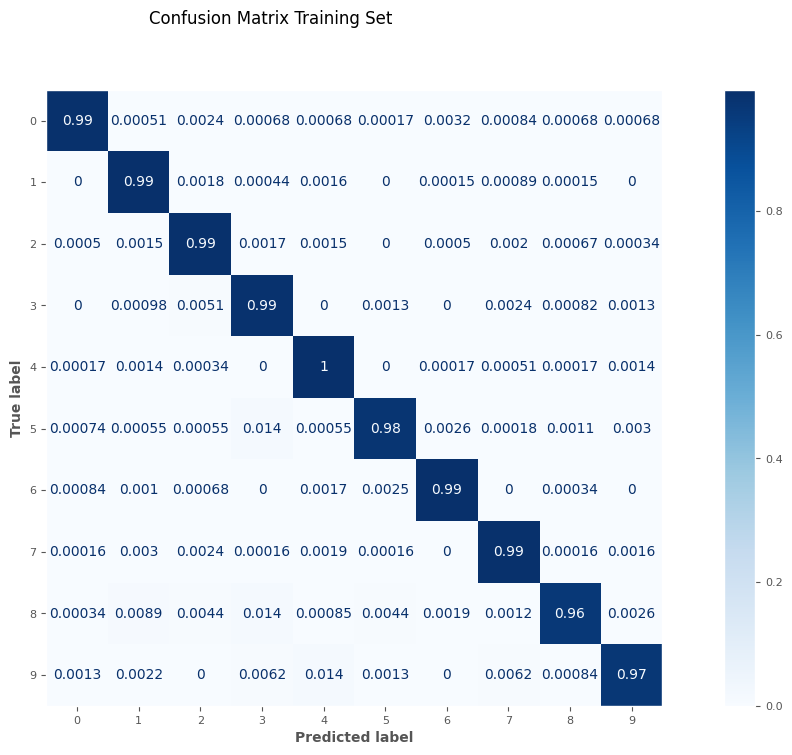

In [60]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(ytr, ptr, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Training Set")
plt.grid(None)
plt.show()

In [68]:
print('Training set')
print(classification_report(ytr, ptr))

Training set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.98      0.99      0.99      5958
           3       0.97      0.99      0.98      6131
           4       0.98      1.00      0.99      5842
           5       0.99      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.96      0.98      5851
           9       0.99      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.99     60000
weighted avg       0.99      0.99      0.99     60000



<Figure size 1200x600 with 0 Axes>

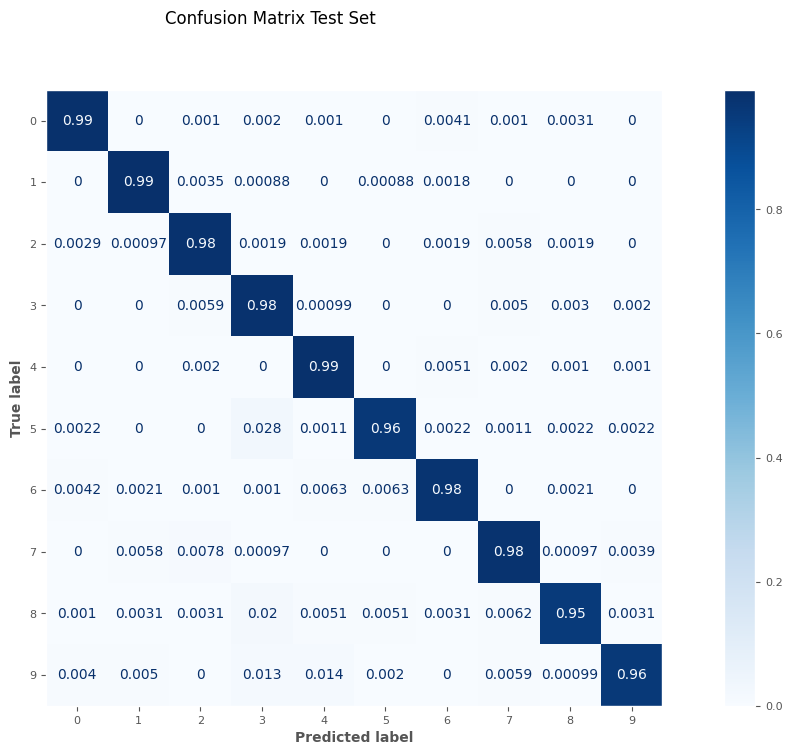

In [69]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(yte, pte, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Test Set")
plt.grid(None)
plt.show()

In [70]:
print('Test set')
print(classification_report(yte, pte))

Test set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Rete neurale convoluzionale a 2+2 strati
Costruiamo una rete con 2 strati di convoluzione (Conv2d + BatchNorm2d + ReLU + MaxPooling) per semplificare l'input in modo da ridurre i parametri finali della rete. Ci aspettiamo molti meno parametri rispetto a prima.
Dopo facciamo uno strato lineare con ReLU e uno strato lineare con Softmax.

Intuitivamente, conv2d applica un filtro all'immagine, mentre maxPooling la comprime a una dimensione pari a 1/4. Questo permette alla rete neurale di concentrarsi maggiormente sulle feature di alto livello dell'immagine e non sui singoli pixel.

In [73]:
class NeuralNet3(nn.Module):
    def __init__(self, n_channels, num_classes):
        super(NeuralNet3, self).__init__()
        self.conv1 = nn.Conv2d(n_channels, 4, 5)  # input (1,28,28) output (4, 24, 24)
        self.bn1 = nn.BatchNorm2d(4)  # input (4, 24, 24) output (4, 24, 24)
        self.relu1 = nn.ReLU()  # input (4, 24, 24) output (4, 24, 24)
        self.pool1 = nn.MaxPool2d(2, 2)  # input (4, 24, 24) output (4, 12, 12)
        self.conv2 = nn.Conv2d(4, 6, 3)  # input (4, 12, 12) output (6, 10, 10)
        self.bn2 = nn.BatchNorm2d(6)  # input (6, 10, 10) output (6, 10, 10)
        self.relu2 = nn.ReLU()  # input (6, 10, 10) output (6, 10, 10)
        self.pool2 = nn.MaxPool2d(3, 2)  # input (6, 10, 10) output (6, 4, 4)
        self.f = nn.Flatten()
        self.l1 = nn.Linear(6 * 4 * 4, 32)
        self.relu1 = nn.ReLU()
        self.l3 = nn.Linear(32, num_classes)
        self.ls = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        out = self.f(out)
        out = self.l1(out)
        out = self.relu1(out)
        out = self.l3(out)
        out = self.ls(out)
        return out

In [74]:
n_channels = 1
model3 = NeuralNet3(n_channels, num_classes)

In [75]:
print(model3)

NeuralNet3(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (f): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=96, out_features=32, bias=True)
  (l3): Linear(in_features=32, out_features=10, bias=True)
  (ls): LogSoftmax(dim=1)
)


Visto? Ci sono solo 3780 coefficienti. Addirittura meno della rete neurale iniziale (7850).

In [76]:
s = 0
for name, param in model3.named_parameters():
    print(f"Parameter {name}, shape {param.shape}, {param.numel()} coefficients")
    s += param.numel()
print(f"{s} coefficients overall")

Parameter conv1.weight, shape torch.Size([4, 1, 5, 5]), 100 coefficients
Parameter conv1.bias, shape torch.Size([4]), 4 coefficients
Parameter bn1.weight, shape torch.Size([4]), 4 coefficients
Parameter bn1.bias, shape torch.Size([4]), 4 coefficients
Parameter conv2.weight, shape torch.Size([6, 4, 3, 3]), 216 coefficients
Parameter conv2.bias, shape torch.Size([6]), 6 coefficients
Parameter bn2.weight, shape torch.Size([6]), 6 coefficients
Parameter bn2.bias, shape torch.Size([6]), 6 coefficients
Parameter l1.weight, shape torch.Size([32, 96]), 3072 coefficients
Parameter l1.bias, shape torch.Size([32]), 32 coefficients
Parameter l3.weight, shape torch.Size([10, 32]), 320 coefficients
Parameter l3.bias, shape torch.Size([10]), 10 coefficients
3780 coefficients overall


In [77]:
learning_rate = 0.001

loss_func3 = nn.NLLLoss(reduction='sum')
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate)

In [78]:
num_epochs = 3

In [79]:
h, h_batch = train(model3, loaders, loss_func3, num_epochs, optimizer3, report=True)

Epoch #1
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cp

Nonostante i soli 3780 parametri, otteniamo comunque il 97% di accuracy. Questo è il miglior modello finora.

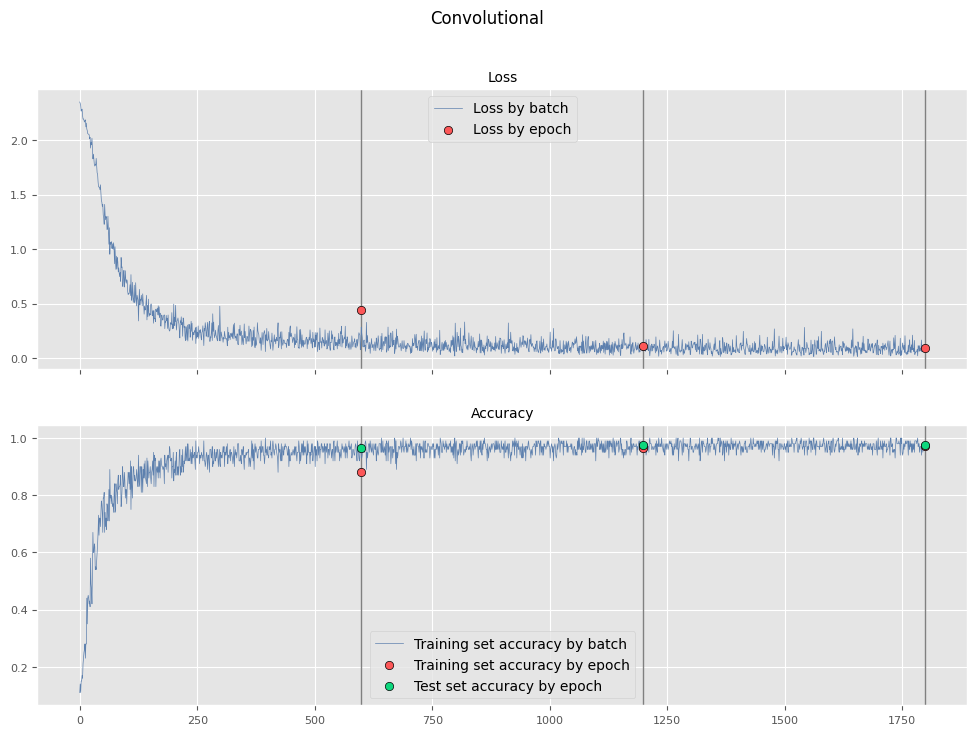

In [80]:
plot_metrics('Convolutional', h, h_batch)

In [81]:
ptr, ytr, pte, yte = predict(model3, loaders)

<Figure size 1200x600 with 0 Axes>

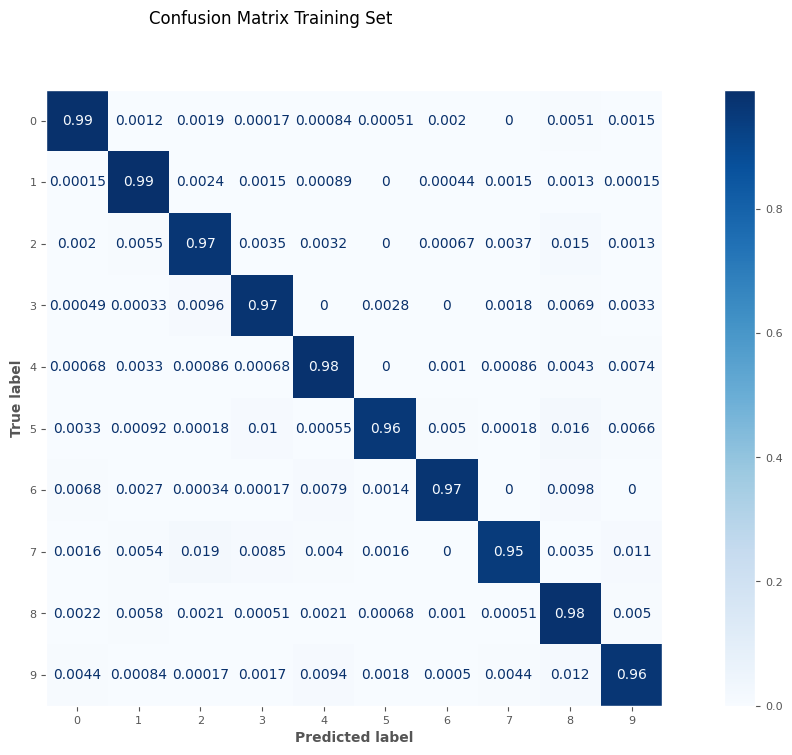

In [82]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(ytr, ptr, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Training Set")
plt.grid(None)
plt.show()

In [83]:
print('Training set')
print(classification_report(ytr, ptr))

Training set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.97      0.96      5958
           3       0.97      0.97      0.97      6131
           4       0.97      0.98      0.98      5842
           5       0.99      0.96      0.97      5421
           6       0.99      0.97      0.98      5918
           7       0.99      0.95      0.97      6265
           8       0.93      0.98      0.95      5851
           9       0.96      0.96      0.96      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



<Figure size 1200x600 with 0 Axes>

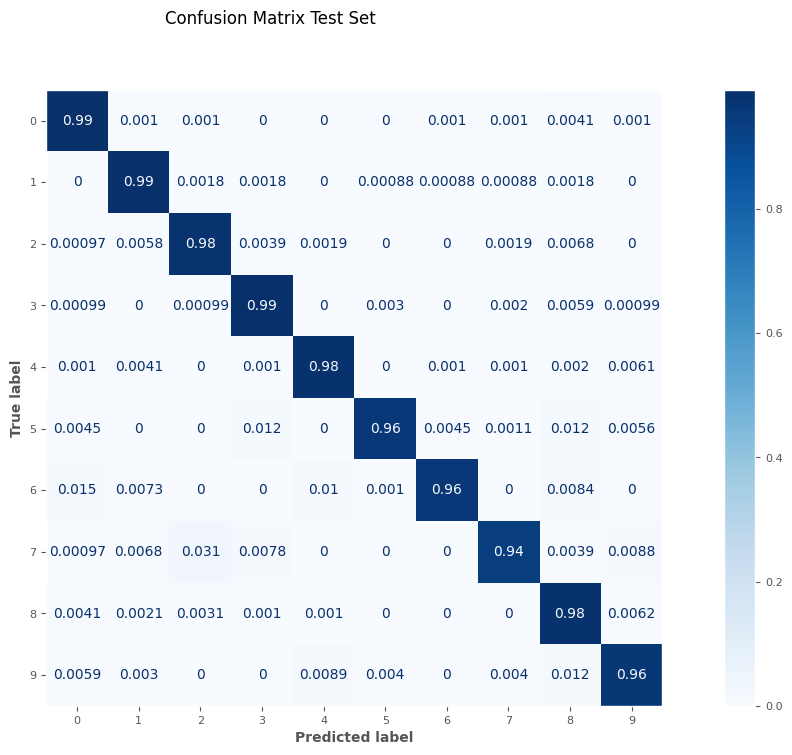

In [85]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(yte, pte, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Test Set")
plt.grid(None)
plt.show()

In [86]:
print('Test set')
print(classification_report(yte, pte))

Test set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.96      0.98       958
           7       0.99      0.94      0.96      1028
           8       0.94      0.98      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Rete neurale convoluzionale (2 convoluzioni con avgPooling + 2 strati con Dropout)
Stavolta usiamo DropOut e AveragePooling (al posto di MaxPooling) e incrementiamo il numero di parametri in uno degli strati lineari (65000+).

AveragePooling è simile a MaxPooling, con l'unica differenza che da 4 pixel viene eseguita la media o il massimo per mantenerne uno solo e ridurre a 1/4 le dimensioni dell'immagine.


In [87]:
class NeuralNet4(nn.Module):
    def __init__(self, n_channels, num_classes):
        super(NeuralNet4, self).__init__()
        self.conv1 = nn.Conv2d(n_channels, 12, kernel_size=3, stride=1,
                               padding=2)  # input (1,28,28) output (12, 30, 30)
        self.bn1 = nn.BatchNorm2d(12)  # input (12, 30, 30) output (12, 30, 30)
        self.relu1 = nn.ReLU()  # input (12, 30, 30) output (12, 30, 30)
        self.pool1 = nn.AvgPool2d(2, 2)  # input (12, 30, 30) output (12, 15, 15)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)  # input (12, 15, 15) output (6, 13, 13)
        self.bn2 = nn.BatchNorm2d(6)  # input (6, 13, 13) output (6, 13, 13)
        self.relu2 = nn.ReLU()  # input (6, 13, 13) output (6, 13, 13)
        self.f = nn.Flatten()  # input (6, 13, 13) output (1014)
        self.d = nn.Dropout(p=.3)  # input (1014) output (1014)
        self.l1 = nn.Linear(1014, 64)  # input (1014) output (64)
        self.relu3 = nn.ReLU()  # input (64) output (64)
        self.l3 = nn.Linear(64, num_classes)  # input (64) output (10)
        self.ls = nn.LogSoftmax(dim=1)  # input (10) output (10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.f(out)
        out = self.d(out)
        out = self.l1(out)
        out = self.relu3(out)
        out = self.l3(out)
        out = self.ls(out)
        return out

In [88]:
n_channels = 1
model4 = NeuralNet4(n_channels, num_classes)

In [89]:
print(model4)

NeuralNet4(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(12, 6, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (f): Flatten(start_dim=1, end_dim=-1)
  (d): Dropout(p=0.3, inplace=False)
  (l1): Linear(in_features=1014, out_features=64, bias=True)
  (relu3): ReLU()
  (l3): Linear(in_features=64, out_features=10, bias=True)
  (ls): LogSoftmax(dim=1)
)


In [90]:
s = 0
for name, param in model4.named_parameters():
    print(f"Parameter {name}, shape {param.shape}, {param.numel()} coefficients")
    s += param.numel()
print(f"{s} coefficients overall")

Parameter conv1.weight, shape torch.Size([12, 1, 3, 3]), 108 coefficients
Parameter conv1.bias, shape torch.Size([12]), 12 coefficients
Parameter bn1.weight, shape torch.Size([12]), 12 coefficients
Parameter bn1.bias, shape torch.Size([12]), 12 coefficients
Parameter conv2.weight, shape torch.Size([6, 12, 3, 3]), 648 coefficients
Parameter conv2.bias, shape torch.Size([6]), 6 coefficients
Parameter bn2.weight, shape torch.Size([6]), 6 coefficients
Parameter bn2.bias, shape torch.Size([6]), 6 coefficients
Parameter l1.weight, shape torch.Size([64, 1014]), 64896 coefficients
Parameter l1.bias, shape torch.Size([64]), 64 coefficients
Parameter l3.weight, shape torch.Size([10, 64]), 640 coefficients
Parameter l3.bias, shape torch.Size([10]), 10 coefficients
66420 coefficients overall


In [91]:
learning_rate = 0.001

loss_func4 = nn.NLLLoss(reduction='sum')
optimizer4 = torch.optim.Adam(model4.parameters(), lr=learning_rate)

Addestriamo per solo 2 epoche, incrementando però i parametri da 3780 a 66420.

In [92]:
num_epochs = 2
h, h_batch = train(model4, loaders, loss_func4, num_epochs, optimizer4, report=True)

Epoch #1
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cpu
.device y_hat:  cpu
device y_hat:  cpu
device y_hat:  cp

Otteniamo una accuratezza sul testing set del 98.5%, mai ottenuta prima!

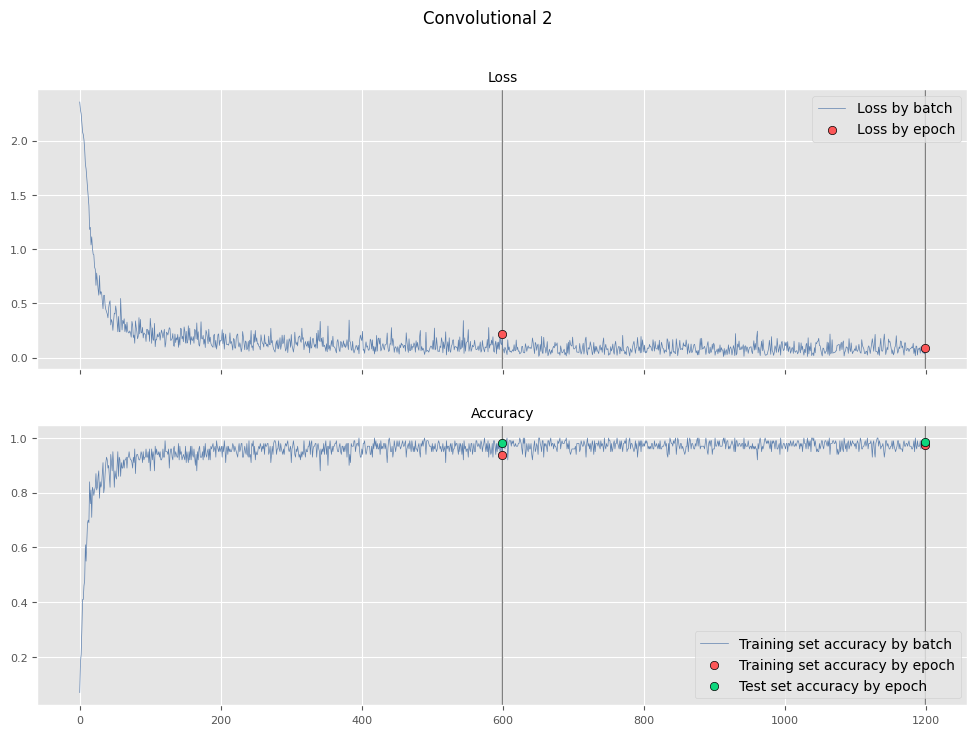

In [95]:
plot_metrics('Convolutional 2', h, h_batch, num_epochs=2)

In [96]:
ptr, ytr, pte, yte = predict(model4, loaders)

<Figure size 1200x600 with 0 Axes>

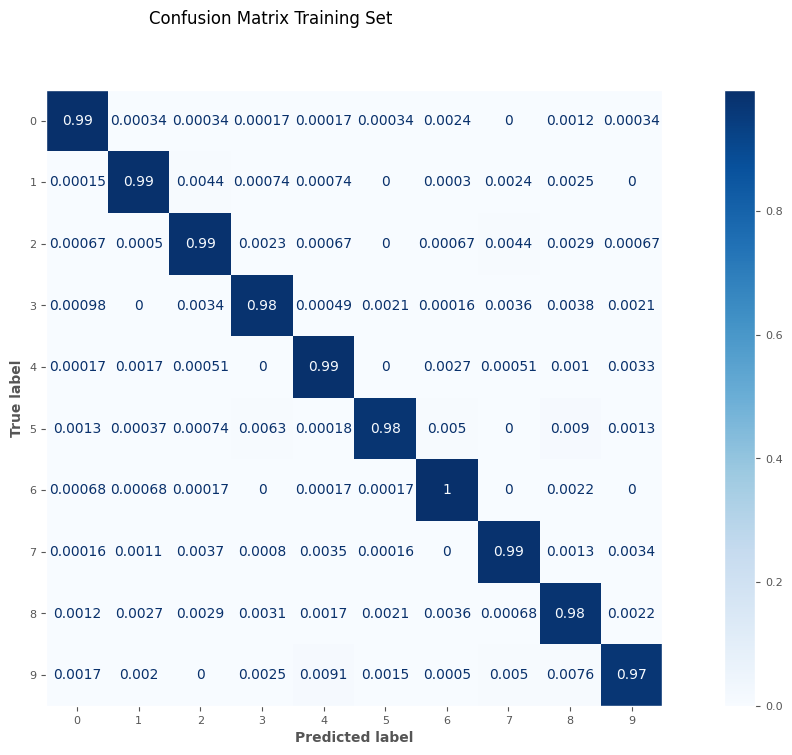

In [97]:
plt.figure(figsize=(12, 6))
disp = ConfusionMatrixDisplay.from_predictions(ytr, ptr, normalize='true', cmap='Blues')
disp.figure_.suptitle("Confusion Matrix Training Set")
plt.grid(None)
plt.show()

In [98]:
print('Training set')
print(classification_report(ytr, ptr))

Training set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.98      0.99      0.99      5958
           3       0.98      0.98      0.98      6131
           4       0.98      0.99      0.99      5842
           5       0.99      0.98      0.98      5421
           6       0.99      1.00      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.97      0.98      0.97      5851
           9       0.99      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

